In [206]:
!pip install calmap

In [207]:
import matplotlib 
import matplotlib.pyplot as plt 

import numpy as np 
import pandas as pd

import calmap

from pandas.plotting import register_matplotlib_converters 
register_matplotlib_converters() 

import seaborn as sns 
sns.set_style('white')
%config InlineBackend.figure_format = 'svg'

%matplotlib inline

# Упражнение 1

In [4]:
#  Реализуйте функцию plot_horizontal_bar, рисующую горизонтальные bar'ы

In [5]:
def plot_horizontal_bar(bars_length, labels, yticks_labels, figsize):
    fig, ax = plt.subplots()
    fig.set_figwidth(figsize[0])    
    fig.set_figheight(figsize[1])   
    
    y_pos = np.arange(len(yticks_labels))
    x_pos = np.arange(min(bars_length),max(bars_length)+1)
    ax.barh(y_pos, bars_length, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(yticks_labels)
    ax.set_xticks(x_pos)
    for i in range(len(labels)):
        plt.text(0 if bars_length[i]<0 else bars_length[i],i,labels[i], horizontalalignment='left', verticalalignment='center', fontdict={'color':'red' , 'size':14})
       
    plt.show()

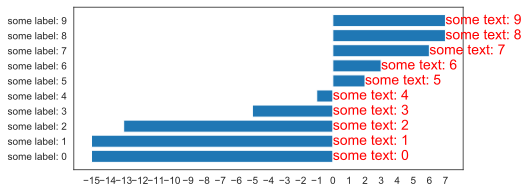

In [9]:
bars_length = np.random.randint(-15, 10, 10)
bars_length.sort()

yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]
figsize = (7, 3)

plot_horizontal_bar(bars_length, labels, yticks_labels, figsize)

# Упражнение 2

In [ ]:
# Реализуйте функцию plot_time_probabilities, рисующую изменяющиеся во времени вероятности неких событий.
# Cобытия для нас имеют тональность (от плохого к хорошему). Отразите ее на графике с помощью градиента по цвету.

In [199]:
def plot_time_probabilities(probabilities_in_time, figsize):
    colors = [plt.cm.Spectral((10-i)/10) for i in range(10)]

    fig, ax = plt.subplots(1,1,figsize=figsize)
    labs = probabilities_in_time.columns.tolist()
    for i in range(len(labs)):
        labs[i]='Probability: '+str(labs[i])

    x  = probabilities_in_time.index
    y0 = probabilities_in_time[0].values.tolist()
    y1 = probabilities_in_time[1].values.tolist()
    y2 = probabilities_in_time[2].values.tolist()
    y3 = probabilities_in_time[3].values.tolist()
    y4 = probabilities_in_time[4].values.tolist()
    y5 = probabilities_in_time[5].values.tolist()
    y6 = probabilities_in_time[6].values.tolist()
    y7 = probabilities_in_time[7].values.tolist()
    y8 = probabilities_in_time[8].values.tolist()
    y9 = probabilities_in_time[9].values.tolist()
    y = np.vstack([y0, y1, y2, y3, y4, y5, y6, y7, y8, y9])

    ax = plt.gca()
    ax.stackplot(x, y,  colors=colors, labels=labs)

    ax.set(ylim=[0, 1.1])
    plt.legend(fontsize=10, ncol=1, loc='lower left')
    
    plt.show()

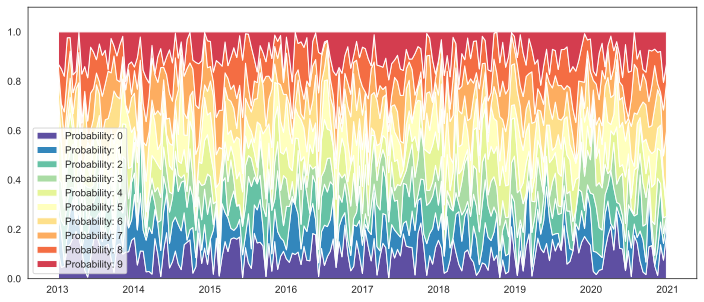

In [200]:
# Сигнатура функции и пример вывода:

dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti
figsize = (12, 5)


plot_time_probabilities(probabilities_in_time, figsize)

### Упражнение 3

In [ ]:
# Реализуйте функцию plot_intraday_ts, рисующую тепловую карту по временному ряду с внутридневными данными

In [211]:
# Сигнатура функции и пример вывода:

intraday_ts = pd.Series(np.random.randint(0, 100, 3625), 
                        index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday_ts.loc[(intraday_ts.index.hour < 9) | (intraday_ts.index.hour > 18)] = np.nan
figsize = (12, 7)


#plot_intraday_ts(intraday_ts, figsize)